<a href="https://colab.research.google.com/github/selsaady1/MAT-421-Elsaady/blob/main/DAT301Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instacart Market Basket Orders Data Set

Here we import the appropriate statistical, graphical, & mathematical libraries to conduct the statistical analysis.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as sma
from scipy import stats

## Data Set Background

An American retail company called Instacart provides grocery delivery & pickup services in both the US and Canada. Both a website and a mobile app are used by the business to provide its services. Customers can use the service to order goods from participating stores, and a personal shopper will conduct the shopping for them. The data set for this circumstance is an interactional collection of files that track consumer order information over time. There is also a sample of 500 users for us to analyze. The goal of the competition is to predict the items that will be in a user's upcoming order. The data set consists of an anonymous sample of much more than 200,000 Instacart consumers' and more than 3 million grocery orders.

- The data set titled “Instacart Market Basket Orders” has 5 columns and 500 rows.
- Thought the data sets there are plenty of different data files that contain different data such as the orders, departments, orders prior, etc. We will be analyzing this. 
- We will attempt to model this data set through regression tools and graphical representations. 
- We are interested in learning how ordering quantity and frequency affect reorders. We are also interested in understanding the data's distribution and correlations. 
- The data sets can be found [here](https://www.kaggle.com/competitions/instacart-market-basket-analysis/data).
- The users set can be found [here](https://raw.githubusercontent.com/ykaih/AGEC317/master/Random_500users_train.csv).

## Problem Definition

- We need to modify the data before getting started with the analysis.
- The current issue is that the data set fails to show how reorders, products ordered all at once, and days between orders relate to one another. Also, the different files with the different variables fail to help us understand the correlation of the variables. 
- To better understand the data, I want to model it using regression, and statistical analysis.
- We want to know if the sample data suggests that the quantity of orders and the frequency of purchases affect reorders.
- We will try to model this data set through regression and machine learning. QQ plots and density graphs will be used.
- We want to know the probability of a customer checking out with X amount of products in a cart in order to better understand the data and provide high quality sales turnover for the Instacart site. Data can be found [here](https://mdporter.github.io/DS6030/other/instacart.html).

In [ ]:
# Here we read the dataset and every file that came within the URL
# The links can be found above in the data set background section
orders = pd.read_csv('Downloads/orders.csv')
orderproductsprior = pd.read_csv('Downloads/order_products__prior.csv')
orderproductstrain = pd.read_csv('Downloads/order_products__train.csv')
departments = pd.read_csv('Downloads/departments.csv')
products = pd.read_csv('Downloads/products.csv')
aisles = pd.read_csv('Downloads/aisles.csv')

## Preparing & Visualizing The Data

Here, the data set is being modified, visualized, and cleaned. This will assist in getting the data set ready for later analysis so that we can employ statistical techniques like regression and graphical representations without running into any issues. The relationship between the frequency of purchases, the number of items per order, and the number of reorders can be understood by changing the data. 

Here, we create a table to show the connection between purchase reorders, and the quantity of repeat orders. We will take a look at the product IDs and reorder numbers along with the product counts. This will help us understand the data even more!

In [ ]:
# Here we merge the data through the collection of files found at Kaggle.com
# We can see that the order ID is identified by the number of products in each order.
# The product number is identified by the number of times it was reorders as a SUM.

dat = pd.merge(orders, orderproductsprior)  # merging the data set.
prodcount = dat.groupby('order_id')['product_id'].count() # product count being through ID
recount = dat.groupby('product_id')['reordered'].sum() # product reorders being through ID

#Here we form the table for visualization of the merged data set.
table = pd.DataFrame({'#Reorders': recount, 
                       '#Products': prodcount}).sort_values(by="#Reorders", ascending=False, kind="mergesort")
table

,#Reorders,#Products
24852,398609.0,4.0
13176,315913.0,10.0
21137,205845.0,11.0
21903,186884.0,14.0
47209,170131.0,41.0
...,...,...
3421079,NaN,1.0
3421080,NaN,9.0
3421081,NaN,7.0
3421082,NaN,7.0


This table illustrates the number of redorders in a decending manner that highlights the quantity of reorders depending on the product ID. This helps us understand the highest performing products and the relationship between the key variables. 

We now create a histogram to show the interdependencies between the various variables.

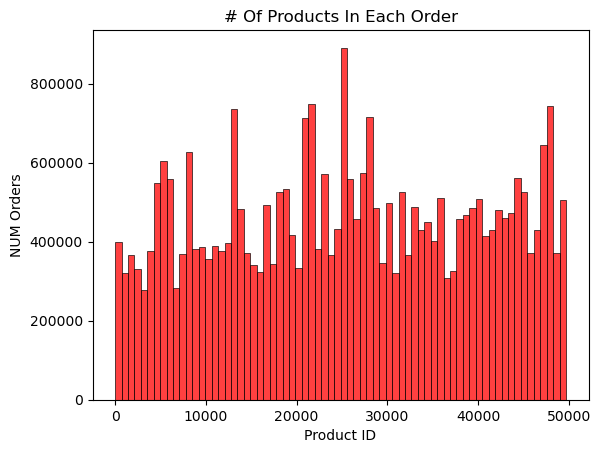

In [ ]:
# The # of products within each order is show below illustrating the independecies. 
sns.histplot(data=dat, x='product_id',  bins=70, color = "red")
plt.title("# Of Products In Each Order")
plt.xlabel("Product ID")
plt.ylabel("NUM Orders")
plt.show()

We can see that this data is distributed evenly. The number of orders is distributed evenly amongst every single product which means that the items are all within line of being purchased at the same rate. This graphic is very important in understanding the data. 

We can take a look at the days since previous reorders graphic to help us understand the data. 

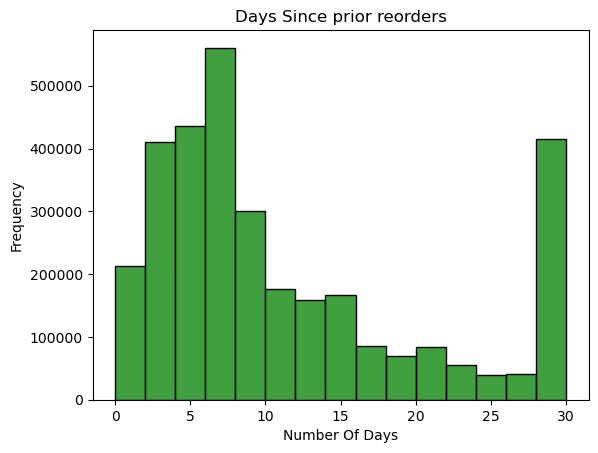

In [ ]:
# This histogram shows the number of days since prior reorders.
sns.histplot(data=orders, x= 'days_since_prior_order',bins=15, color = "green")
plt.title("Days Since prior reorders")
plt.xlabel("Number Of Days")
plt.ylabel("Frequency")
plt.show()

The days since prior reorders is right skewed meaning that the number of days is less than 12 on average. 

##  Data Analysis

To better comprehend the relationship between the data and the correlation, we create 2D regression graphics. After changing and reviewing the data set, we can now perform regression methods.

- We will utilized the 500 user data for the regression modeling and this can be found at [here](https://raw.githubusercontent.com/ykaih/AGEC317/master/Random_500users_train.csv).
- This data set will be very important in the statistical modeling and data analysis procedures. 
- Here we take a look at the regression results in python. But first we read the data.

In [ ]:
dataset = pd.read_csv('Downloads/Random_500users_train.csv')

Now we can continue to display and display the regression results. This will help in formulating the equation. This helps us understand the correlation and connection between the reorders, products, and the days between each order. This is crucial.

In [ ]:
results = sm.ols(formula="reorders ~ products + days_since_prior_order", data=dataset).fit()
print(results.params)

Intercept                 0.347777
products                  0.679640
days_since_prior_order   -0.067168
dtype: float64


We see that the correlation across all 3 is weak due to the results received above. We can now move on to see the correlation between the products and reorders. We can now conduct exploratory data analysis on the products and reorders to help us understand the data. 

Now we will comput exploritory data analysis below:

In [ ]:
Y = dataset['products'] # We identify the Y data set as products
X = dataset['reorders'] # We identify the x data set as reorders

X = sma.add_constant(X) # We add another columns for a regression constant.

#Here we are running our model and displaying the results.
model = sma.OLS(Y, X, missing='drop') 
DAT = model.fit()
DAT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               products   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1432.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.41e-148
Time:                        19:02:07   Log-Likelihood:                -1407.7
No. Observations:                 500   AIC:                             2819.
Df Residuals:                     498   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5890      0.257     13.944      0.000       3.083       4.095
reorders       1.0930      0.029     37.836      0.000       1.036       1.150
==============================================================================
Omnibus:                       77.911   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.421
Skew:                           1.090   Prob(JB):                     6.39e-25
Kurtosis:                       3.771   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe that the variables have a strong degree of correlation because the R squared value is 0.742. This is crucial when figuring out how reorders relate to the product. The outcome of the data regression is significant. The explanatory variables can account for 74% of the variance in the response variable. This is really significant and vital.

We take a look at the number of reorder below in a histogram table format. This helps us understand that Instacart reorders are within the <15 range.

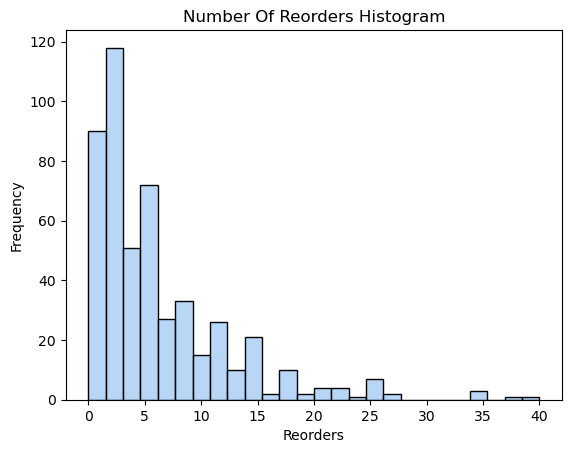

In [ ]:
sns.set_palette("pastel")
sns.histplot(dataset['reorders']);
plt.title("Number Of Reorders Histogram")
plt.xlabel("Reorders")
plt.ylabel("Frequency")
plt.show()

The <15 range represents the majority of reorders, which means that the rest of the data above this region can be considered as outliers. We can also form a boxplot here to further prove this:

C:\Users\Saifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


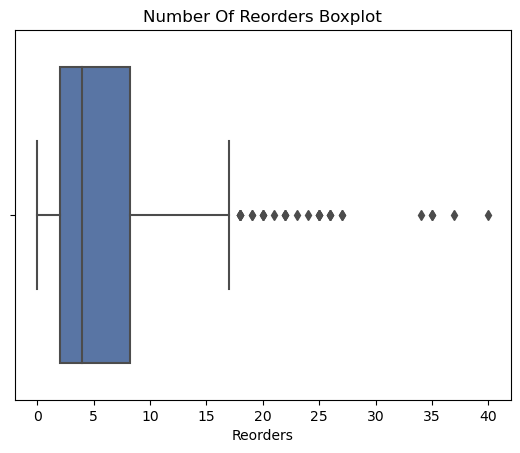

In [ ]:
sns.set_palette("deep")
sns.boxplot(dataset['reorders']);
plt.title("Number Of Reorders Boxplot")
plt.xlabel("Reorders")
plt.show()

Here we can view the residuals as a kernel density plot using the mean and standard deviation that we got:

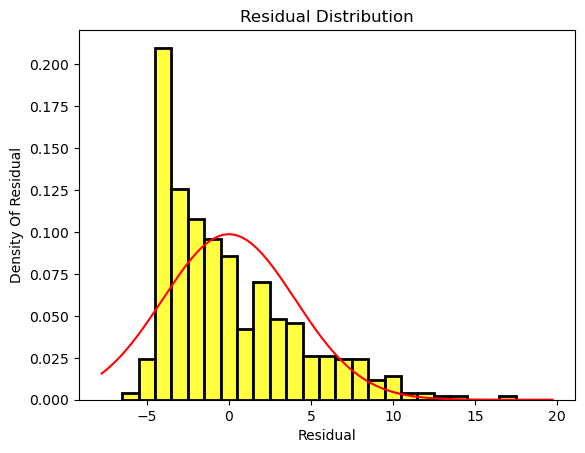

In [ ]:
# The mean & standard deviation for the best fit normal distribution.
residual = DAT.resid
fig, ax = plt.subplots();
mu, std = stats.norm.fit(residual);
sns.set_palette("deep")

# Forming the cumulative residual plot
sns.histplot(x=residual, 
             ax=ax, 
             stat="density", linewidth=2, fill= True, discrete= True, color = 'yellow')
plt.title("Residual Distribution") #labels
plt.xlabel("Residual") #labels
plt.ylabel("Density Of Residual") #labels

# Now we plot the curve.
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100000) # generate some x values, large 10,0000 number for curver accuracy.
p = stats.norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

We can see that the data is heavily right skewed with the residuals. This is important to note. 

We now generate a qqplot below to understand the data.

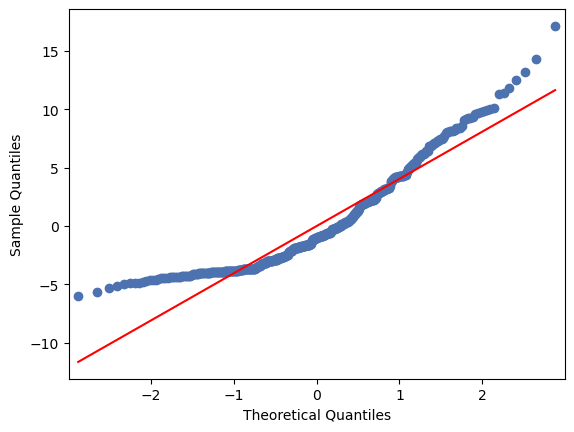

In [ ]:
sma.qqplot(residual, line='s');

This QQ plot illustrates a curve, and this means that the data is skewed. This is further proof that the data has a rightly skewed distribution as evidenced by the density histogram.  At one point throughout the middle interval of the data (0.5,2) the points seem to fall about a straight line which could mean that it is a normal distribution at this point. But the data is rightly skewed because we observe the entire graphic and not a particular section. The data set of products & reorders is rightly skewed.

Let us now visualize a regression line.

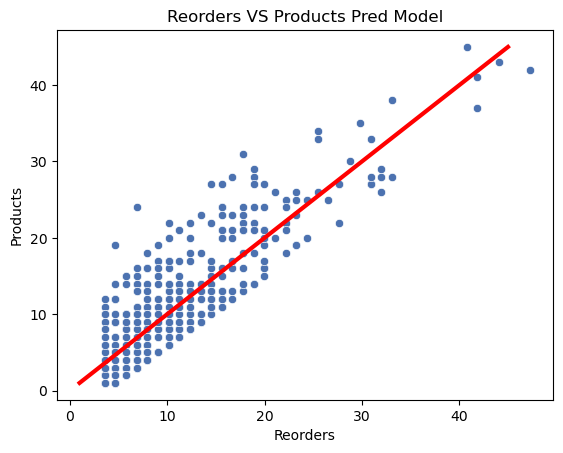

In [ ]:
Y_max = Y.max()
Y_min = Y.min()
fit = DAT.fittedvalues

sns.scatterplot(x=fit, y=Y)
plt.title("Reorders VS Products Pred Model") #labels
plt.xlabel("Reorders") #labels
plt.ylabel("Products") #labels


plt.plot(np.linspace(Y_min, Y_max, 100), 
         np.linspace(Y_min, Y_max, 100), color='red', linewidth=3)
plt.show()

It was discovered through statistical linear regression that there is a significant and linear relationship between the two variables.

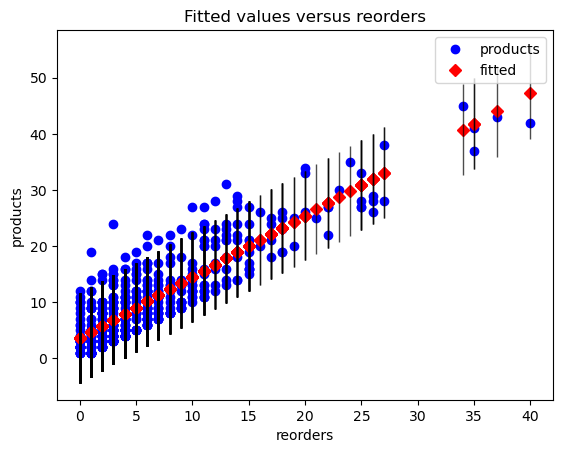

In [ ]:
sma.graphics.plot_fit(DAT,1, vlines=True);

The graph above is another way to look at the data set and relationship between the observed variables.

In several different scenarios customers will add plenty of items to their carty and end up checking out with little to no items from what they initially had in their cart. The probability of a customer checking out if one items is in a cart is 0.65 given a 5 item sample. Data can be found [here](https://mdporter.github.io/DS6030/other/instacart.html).

Using the We want to understand the probability statistics and important factors of amount of products in a cart in order to better understand the data and provide high quality sales turnover for the Instacart site. 

### Part 1

We calculate the mean distribution for this order product turnover.


$$
u = E(x) = n*p = 5 * .65 = 3.25
$$

In [ ]:
#In python
u = 5 * .65
u

3.25

### Part 2

We calculate the stadard deviation of the distrivtuion for this product turnover.

$$
σ^2 = v(x) = n*p * (1-p) = 5*(.65)*(1-.65) = 1.1375
$$

In [ ]:
#In python
σ = 5*(.65)*(1-.65)
σ

1.1375

### Part 3

The probability that exactly X amount of items out of the 5 samples items will be ordered through checkout formula for computation.

$$
f(x) = (p)^x * (1-p)^x *(n! / (r!(n-r)!)) = (.65)^x * (1-.65)^x *(5! / (r!(5-r)!)) 
$$

Now we form the probability mass function for this distribution:

In [ ]:
#REcall STATS libraries
import numpy as np
import types
from nose.tools import assert_equal, assert_raises
import scipy.stats, scipy.special

In [ ]:
# We calculate the values to form the probability mass function. 
a = scipy.special.comb(5,1) * ((.65) ** 0) * ((1-.65) ** 5)
b = scipy.special.comb(5,2) * ((.65) ** 1) * ((1-.65) ** 4)
c = scipy.special.comb(5,3) * ((.65) ** 2) * ((1-.65) ** 3)
d = scipy.special.comb(5,4) * ((.65) ** 3) * ((1-.65) ** 2)
e = scipy.special.comb(5,5) * ((.65) ** 4) * ((1-.65) ** 1)

data = {'X' : [1.0,2.0,3.0,4.0,5.0],'Probability' : [a,b,c,d,e]}
df = pd.DataFrame(data)
df

,X,Probability
0,1.0,0.026261
1,2.0,0.097541
2,3.0,0.181147
3,4.0,0.168208
4,5.0,0.062477


## Conclusion

An anonymous sample of more than 3 million grocery orders from more than 200,000 Instacart users made up the data set.  We also had a data set of 500 rows that illustrated the reorders and product data. We modified, visualized, and cleaned the data. We can employed statistical techniques like regression and graphical representations without running into any issues when we cleaned the data set. The relationship between the frequency of purchases, the number of items per order, and the number of reorders was understood by changing the data. We observed  purchase reorders, and the quantity of repeat orders in table representation. We found out the highest performing products and how they all perform the same on average according to the histograms we formed. We see that the correlation across all 3 variables (reorders, products, days since reorders) is weak due to the results received above. Using statistical linear regression it was determined that a strong and linear relationship exists between the two variables (reorders & products). Using a different kind of plots we were able to understand that the data was heavily right skewed. Utilizing regression and machine learning procedures we were able to better understand the relationship between the variables of the data. We created a probability distribution function in order to better understand the distribution of the data. We realize that there is an increased probability of checking out with 2 or 3 items when 5 items are in a cart. This means that Instacart are withing the 40-60% boundary and they need to find a way to optimize their checkout system model. We cleaned the lose data sets that were in different files and analyzed the relationships between the key independent and dependent variables. 
